In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv('Titanic_toy.csv')
df.sample(8)

,Age,Fare,Family,Survived
617,26.0,16.1000,1,0
298,NaN,30.5000,0,1
155,51.0,61.3792,1,0
767,30.5,7.7500,0,0
327,36.0,NaN,0,1
216,27.0,7.9250,0,1
337,41.0,134.5000,0,1
561,40.0,7.8958,0,0


In [4]:
df.shape

(891, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [7]:
df.isnull().mean()*100 

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [8]:
X = df.drop(columns=['Survived'])
y =df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [10]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [11]:
X_train.isnull().mean()*100

Age       20.365169
Fare       4.915730
Family     0.000000
dtype: float64

In [12]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_Fare = X_train['Fare'].mean()
median_Fare = X_train['Fare'].median()

In [13]:
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
X_train['Age_median'] = X_train['Age'].fillna(median_age)

X_train['Fare_mean'] = X_train['Fare'].fillna(mean_Fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_Fare)

C:\Users\nagam\AppData\Local\Temp/ipykernel_14464/2629358419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_mean'] = X_train['Age'].fillna(mean_age)
C:\Users\nagam\AppData\Local\Temp/ipykernel_14464/2629358419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age_median'] = X_train['Age'].fillna(median_age)
C:\Users\nagam\AppData\Local\Temp/ipykernel_14464/2629358419.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [14]:
X_train.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
535,7.0,26.2500,2,7.000000,7.0,26.2500,26.2500
306,NaN,110.8833,0,29.804533,28.0,110.8833,110.8833
592,47.0,7.2500,0,47.000000,47.0,7.2500,7.2500
232,59.0,13.5000,0,59.000000,59.0,13.5000,13.5000
606,30.0,7.8958,0,30.000000,30.0,7.8958,7.8958


In [15]:
print("original age variable varience ",X_train['Age'].var())
print("mean age variable imputation ",X_train['Age_mean'].var())
print("median age variable imputation ",X_train['Age_median'].var())
print('\n')
print("original age variable varience ",X_train['Fare'].var())
print("mean age variable imputation ",X_train['Fare_mean'].var())
print("median age variable imputation ",X_train['Fare_median'].var())

original age variable varience  215.80700185714886
mean age variable imputation  171.7957286232716
median age variable imputation  172.32457671877665


original age variable varience  2347.763155700171
mean age variable imputation  2232.1911297514994
median age variable imputation  2246.009904157123


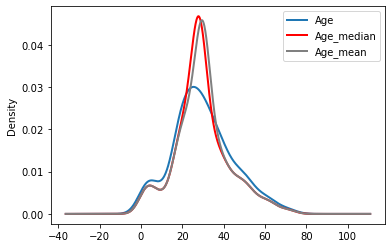

In [16]:
fig = plt.figure()
ax= fig.add_subplot(111)

#original variable distribution
X_train['Age'].plot(kind = 'kde', ax=ax, linewidth=2)

#variable imputed with median
X_train['Age_median'].plot(kind = 'kde', ax=ax,color ='red', linewidth=2)

# variable imputed with mean
X_train['Age_mean'].plot(kind = 'kde', ax=ax,color ='gray', linewidth=2)

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

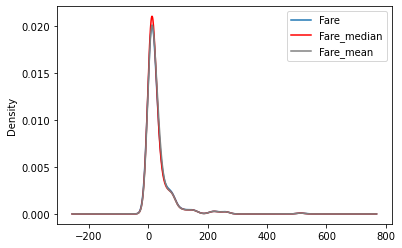

In [17]:
fig = plt.figure()
ax= fig.add_subplot(111)

#original variable distribution
X_train['Fare'].plot(kind = 'kde', ax=ax)

#variable imputed with median
X_train['Fare_median'].plot(kind = 'kde', ax=ax,color ='red')

# variable imputed with mean
X_train['Fare_mean'].plot(kind = 'kde', ax=ax,color ='gray')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [18]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,215.807002,77.465380,-7.448828,215.807002,215.807002,72.641927,69.240090
Fare,77.465380,2347.763156,16.763605,60.821495,65.017780,2347.763156,2347.763156
Family,-7.448828,16.763605,2.586672,-5.929728,-5.843236,15.938392,16.051350
Age_mean,215.807002,60.821495,-5.929728,171.795729,171.795729,57.827469,55.119397
Age_median,215.807002,65.017780,-5.843236,171.795729,172.324577,61.817186,58.972713
Fare_mean,72.641927,2347.763156,15.938392,57.827469,61.817186,2232.191130,2232.191130
Fare_median,69.240090,2347.763156,16.051350,55.119397,58.972713,2232.191130,2246.009904


In [19]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.099642,-0.335645,1.000000,1.000000,0.097545,0.092608
Fare,0.099642,1.000000,0.212744,0.094623,0.101033,1.000000,1.000000
Family,-0.335645,0.212744,1.000000,-0.281292,-0.276764,0.209753,0.210589
Age_mean,1.000000,0.094623,-0.281292,1.000000,0.998464,0.093382,0.088734
Age_median,1.000000,0.101033,-0.276764,0.998464,1.000000,0.099671,0.094792
Fare_mean,0.097545,1.000000,0.209753,0.093382,0.099671,1.000000,0.996919
Fare_median,0.092608,1.000000,0.210589,0.088734,0.094792,0.996919,1.000000


<AxesSubplot:>

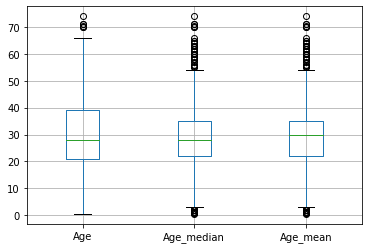

In [20]:
X_train[['Age','Age_median','Age_mean']].boxplot()# for seeing outliers

<AxesSubplot:>

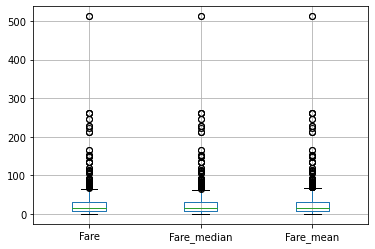

In [21]:
X_train[['Fare','Fare_median','Fare_mean']].boxplot()# for seeing outliers

### Using Sklearn

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [23]:
imputer1 =SimpleImputer(strategy ='median')
imputer2 =SimpleImputer(strategy ='mean')

In [24]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder ='passthrough')

In [25]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [26]:
trf.named_transformers_['imputer2'].statistics_

array([31.63649631])

In [27]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [28]:
X_train = trf.fit_transform(X_train)
X_test = trf.transform(X_test)

In [29]:
X_train

array([[  9.    ,  31.3875,   6.    ],
       [ 28.    ,   7.8958,   0.    ],
       [ 28.    ,  69.55  ,  10.    ],
       ...,
       [ 41.    , 134.5   ,   0.    ],
       [ 28.    ,   8.05  ,   0.    ],
       [ 36.    ,  26.2875,   0.    ]])